In [2]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '../bigdata anlysis II/src/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

# Step1. 탐색: 데이터의 기초 정보 살펴보기

#### * chipotle dataset의 기초 정보 출력하기

In [3]:
import pandas as pd
file_path = "data/chipotle.tsv"
chipo = pd.read_csv(file_path, sep ='\t')

print(chipo.shape)
print("===============================")
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


- 4622개의 행과 5개의 feature
- int64: 숫자, object: 문자열, non-null-object: 결측값이 아닌 데이터

#### * chipotle dataset의 행과 열, 데이터 확인하기

In [4]:
chipo.head() # 테이블 형태로 출력

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
print(chipo.columns)
print("=======================================================")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


- order_id: 주문 번호
- quantity: 아이템의 주문 수량
- item_name: 주문한 아이템의 이름
- choice_description: 주문한 아이템의 상세 선택 옵션
- item_price: 주문 아이템의 가격 정보

#### * describe() 함수로 기초 통계량 출력하기
* 수치형 피처 vs 범주형 피처

In [6]:
# 수치형 피처에 대한 정보만을 출력한다.
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


#### * unique() 함수로 범주형 피처 개수 출력하기

In [7]:
print("count: ", len(chipo['order_id'].unique())) 
print(chipo['order_id'].unique())
print("count: ", len(chipo['item_name'].unique()))
print(chipo['item_name'].unique())

count:  1834
['1' '2' '3' ... '1832' '1833' '1834']
count:  50
['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 '

# Step2. 인사이트의 발견: 탐색과 시각화하기

#### * 가장 많이 주문한 아이템 Top 10 출력하기

In [8]:
item_cnt = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_cnt.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


- enumerate:
- ??.iteritems():

#### * 아이템별 주문 개수와 총량

In [9]:
order_cnt = chipo.groupby('item_name')['order_id'].count()
order_cnt[:6]

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Barbacoa Soft Tacos      25
Name: order_id, dtype: int64

In [10]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:6]

item_name
6 Pack Soft Drink        55
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    12
Barbacoa Salad Bowl      10
Barbacoa Soft Tacos      25
Name: quantity, dtype: int64

- 사실 아이템별 주문 개수와 아이템별 총량은 같다

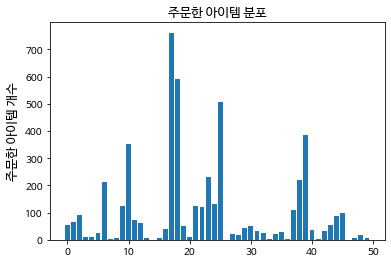

In [15]:
%matplotlib inline
import numpy as np

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
# print(item_quantity.index)
# print(item_quantity.values)

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel("주문한 아이템 개수", fontsize=13)
plt.title("주문한 아이템 분포", fontsize=13)
plt.show()